# DSCI Group Project Proposal: Predicting Heart Disease based on Age, Resting ECG, and Presence of Exercise-Induced Angina #

#### Claire Sheinin, Emese Soti, Saman Atiq, Sarah Teng ####

## Introduction ##

- relevant background information
- question We want to investigate
- Identify and describe the dataset

- ICan we predict if a patient has heart disease based on 

In [24]:
#Loading tidyverse libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [25]:
cleveland <- read_csv("processed.cleveland.data")
cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [26]:
#cleaning/wrangling

columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland <- read_csv("processed.cleveland.data", col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [33]:
cleveland_tidy <- cleveland |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = "No", "1" = "Yes", "2" = "Yes", "3" = "Yes", "4" = "Yes"),
    exang = as.factor(as.integer(exang)),
    age = as.integer(age),
    restecg = as.integer(restecg),
      )
cleveland_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,No


In [ ]:
#visualize training data

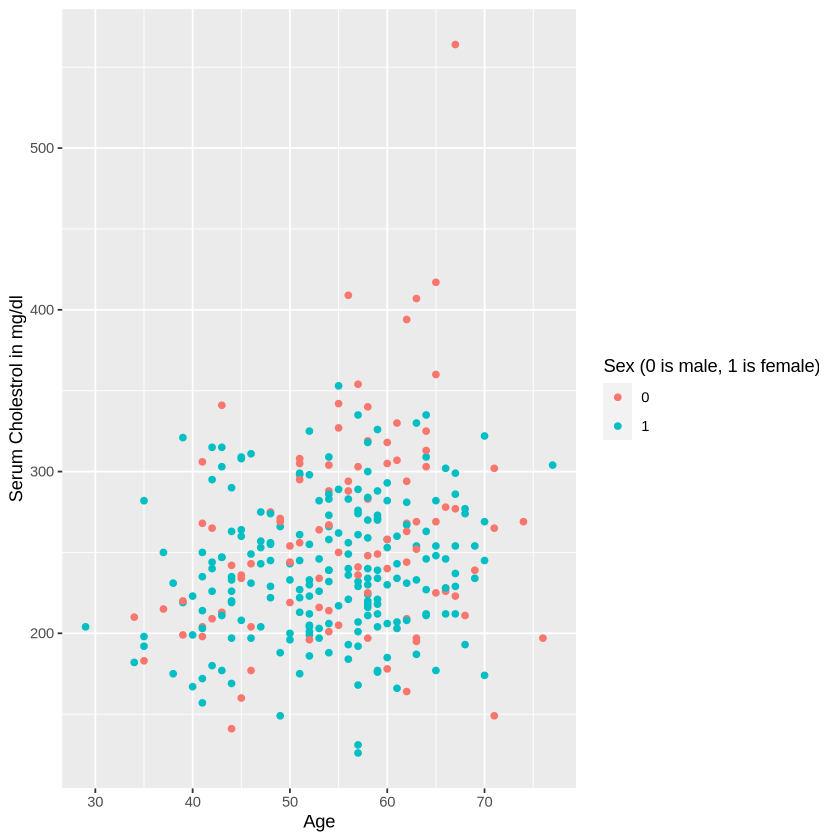

In [10]:
age_chol_plot <- cleveland |>
ggplot(aes(x = age, y = chol, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Serum Cholestrol in mg/dl", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_chol_plot

In [ ]:
#There is a very weak relationship between chol and age, but not really anything between the two and sex

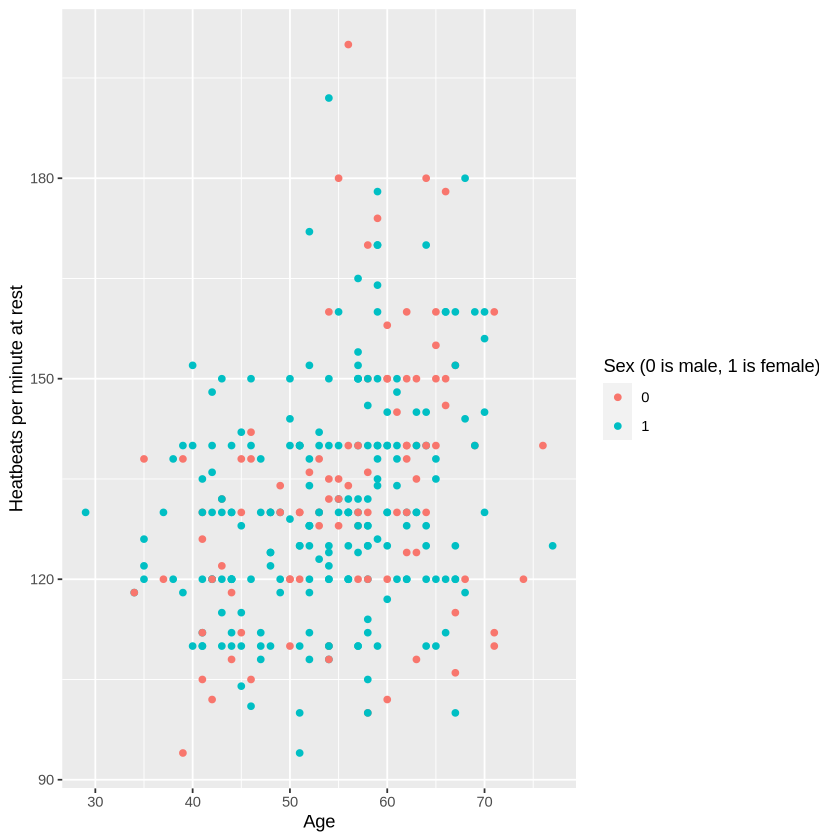

In [11]:
age_rest_bp_plot <- cleveland |>
ggplot(aes(x = age, y = rest_bp, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Heatbeats per minute at rest", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_rest_bp_plot

In [ ]:
#Again, there is no clear relationship between age, sex, and resting heartrate

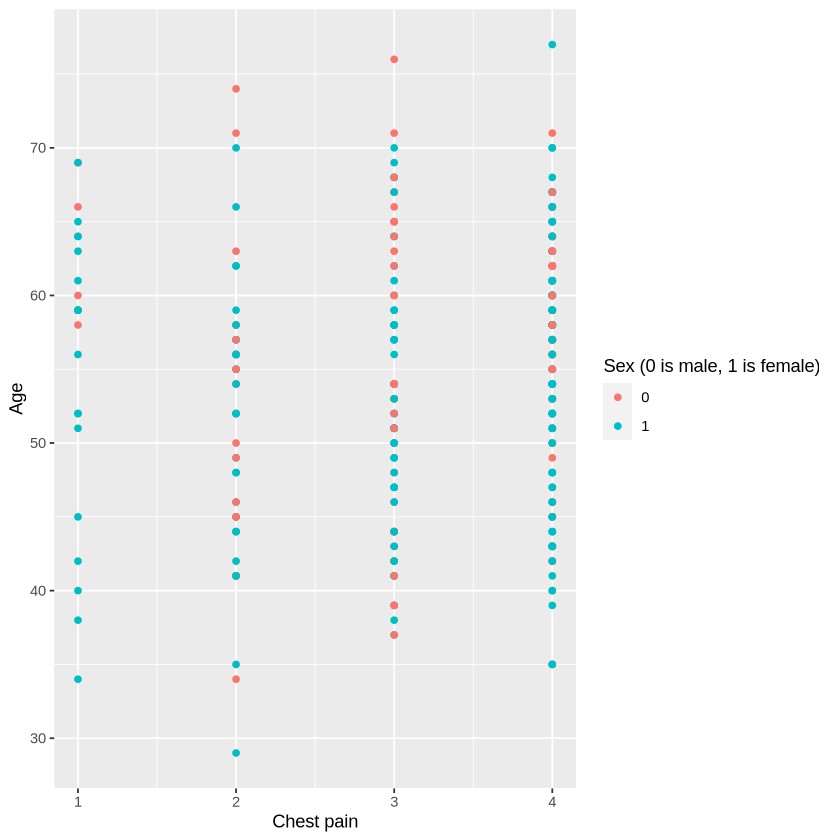

In [12]:
age_chest_pain_plot <- cleveland |>
ggplot(aes(x = chest_pain, y = age, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Chest pain", y = "Age", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")     
age_chest_pain_plot

In [ ]:
chest_pain_4_count <- cleveland |>
filter(chest_pain == 4) |>
count()
chest_pain_4_count
#There are more people with chest pain type 4 than any other type

In [ ]:
chest_pain_4 <- cleveland |>
filter(chest_pain == 4)
chest_pain_4

In [ ]:
age_max_hr_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(sex))) +
geom_point(aes(color = as_factor(sex))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Sex (0 is male, 1 is female)") +
guides(fill = "none")
age_max_hr_plot

In [ ]:
#There is a downward/negative trend in max heartrate as age increases. Sex likely isn't a factor. 

In [ ]:
age_max_hr_chest_pain_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(chest_pain))) +
geom_point(aes(color = as_factor(chest_pain))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of chest pain 
     1 is typical angina 
     2 is atypical angina
     3 is non-anginal
     4 is asymptomatic)") +
guides(fill = "none")
age_max_hr_chest_pain_plot

In [ ]:
#When looking at the type of chest pain, there is no clear distinction between any of them

In [ ]:
age_max_hr_chest_pain_4_plot <- chest_pain_4 |>
ggplot(aes(x = age, y = max_hr)) +
geom_point() +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of chest pain 
     1 is typical angina 
     2 is atypical angina
     3 is non-anginal
     4 is asymptomatic)") +
guides(fill = "none")
age_max_hr_chest_pain_4_plot

In [ ]:
#This is filtered to only include people whose chest pain type is 4. No significant difference between this graph and the previous (the unfiltered one)

In [ ]:
age_max_hr_rest_ecg_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(rest_ecg))) +
geom_point(aes(color = as_factor(rest_ecg))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "Type of resting ECG (electrocardiogram)
     0 is normal
     1 is having ST-T wave abnormality 
     2 is showing probable or definite left ventricular hypertrophy by Estes' criteria") +
guides(fill = "none") 
age_max_hr_rest_ecg_plot

In [ ]:
#Once again, no real distinction between resting ecg and max heart rate

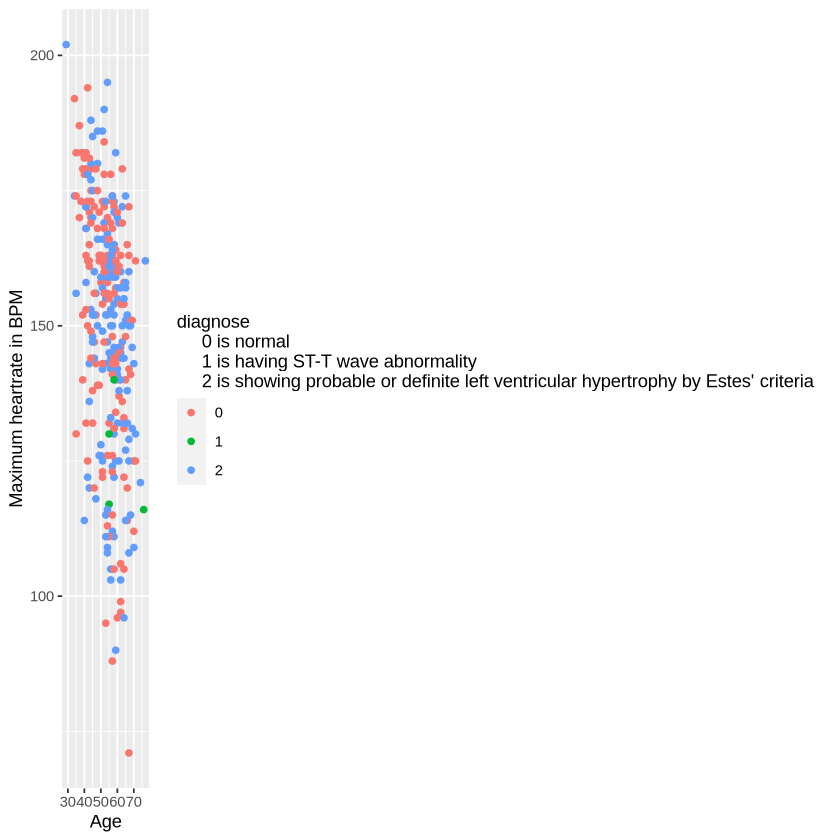

In [14]:
age_max_hr_rest_ecg_plot <- cleveland |>
ggplot(aes(x = age, y = max_hr, fill = as_factor(diagnose))) +
geom_point(aes(color = as_factor(rest_ecg))) +
labs(x = "Age", y = "Maximum heartrate in BPM", color = "diagnose
     0 is normal
     1 is having ST-T wave abnormality 
     2 is showing probable or definite left ventricular hypertrophy by Estes' criteria") +
guides(fill = "none") 
age_max_hr_rest_ecg_plot

## Methods ##

- which variables/columns you will use
- Describe at least one way that you will visualize the results

## Expected Outcomes and Significance ##

- What do you expect to find
- What impact could such findings have
- What future questions could this lead to